<a href="https://colab.research.google.com/github/Najmehmoazzen/Parkinson-s_Disease/blob/main/Ex2_NN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**A NN excersise using MNIST dataset**

## Step 1: Import Libraries




In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
from tensorflow import keras

TensorFlow version: 2.12.0


Load and prepare mnist dataset.

## Step 2: Load the Data

In [ ]:
# Laod MNIST dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


## Step 3: Explore the Data
It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

In [ ]:
# Explore the data
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)
print(x_test.shape)   # (10000, 28, 28)
print(y_test.shape)   # (10000,)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Step 4: Preprocess the Data
The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by 255.0. And we’ll reshape the data to be a 2D array. This also converts the sample data from integers to floating-point numbers:

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0


## Step 5: Build the Model
 We’ll use a simple neural network with one hidden layer.

*   Flattening a tensor: a layer in TensorFlow's Keras API that transforms an input tensor into a 1-dimensional array. It takes an input_shape parameter that specifies the shape of the input tensor, which in this case is (28, 28).The Flatten layer is often used as the first layer in a neural network that processes image data. In this case, it flattens a 2-dimensional input tensor representing a grayscale image with dimensions of 28 pixels by 28 pixels into a 1-dimensional vector of length 784 (28 x 28 = 784). This flattened vector can then be passed to a fully connected neural network layer, which can learn to classify the image based on its features.)

*   The second layer is a Dense layer with 128 neurons and a ReLU activation function. This layer learns higher-level feature representations of the input data.

*   The third layer is a Dropout layer with a dropout rate of 0.2. This layer randomly drops out 20% of the input units during training to prevent overfitting.


*   The fourth and final layer is a Dense layer with 10 neurons, representing the 10 possible output classes (0-9) in the MNIST dataset.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28),),
  tf.keras.layers.Dense(128, activation='relu'),                        #128 neurons in hidden laye
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

## Step 6: Compile the Model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Step 7: Train the Model

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=32,  validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2997 - accuracy: 0.9125 - val_loss: 0.1385 - val_accuracy: 0.9567
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1463 - accuracy: 0.9565 - val_loss: 0.0965 - val_accuracy: 0.9702
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1085 - accuracy: 0.9674 - val_loss: 0.0903 - val_accuracy: 0.9714
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0896 - accuracy: 0.9720 - val_loss: 0.0742 - val_accuracy: 0.9754
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0778 - accuracy: 0.9756 - val_loss: 0.0777 - val_accuracy: 0.9754
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0680 - accuracy: 0.9779 - val_loss: 0.0736 - val_accuracy: 0.9775
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0603 - accuracy: 0.9803 - val_loss: 0.0692 - val_ac

## Step 8: Evaluate the Model

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.0710 - accuracy: 0.9792 - 551ms/epoch - 2ms/step
Test accuracy: 0.979200005531311


The image classifier is now trained to ~98% accuracy on this dataset.

## Step 9: Make Predictions
Finally, we can use the trained model to make predictions on new data.

In [ ]:
predictions = model.predict(x_test[:5])
print(predictions)

1/1 [==============================] - 0s 65ms/step
[[4.69548345e-10 1.17289373e-10 1.14028129e-08 1.86577245e-06
  5.36836988e-16 1.52060338e-08 2.59881516e-18 9.99998093e-01
  7.38856754e-10 4.04625062e-08]
 [1.99957130e-13 3.28536231e-07 9.99999642e-01 9.33482536e-09
  9.96945183e-23 3.19406779e-10 1.06280686e-10 8.05575118e-17
  3.97449433e-08 5.81316200e-21]
 [1.61524172e-09 9.99596536e-01 7.72198400e-05 2.20487095e-08
  2.24583914e-07 3.01909822e-08 4.95415725e-06 2.68422766e-04
  5.25028554e-05 3.69234456e-08]
 [9.99580562e-01 1.66587629e-11 3.03288747e-04 2.20802477e-07
  5.96080296e-09 2.66883922e-06 6.61889044e-06 4.86996360e-05
  2.27669673e-07 5.76826460e-05]
 [4.08326670e-08 4.87281699e-12 6.69651570e-08 2.74374773e-10
  9.97758508e-01 4.41155343e-08 4.51524457e-10 2.80606309e-05
  2.19134204e-08 2.21319613e-03]]


## Step 10: Fine-tune the Model
To improve the performance of the model, we can fine-tune it by adjusting the hyperparameters. In this case, we’ll try increasing the number of hidden layers and neurons.

In [ ]:
#model = keras.Sequential([
#    keras.layers.Dense(256, activation='relu', input_shape=(784,)),
#    keras.layers.Dense(128, activation='relu'),
#    keras.layers.Dense(10, activation='softmax')
#])

#model.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])
#model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
#test_loss, test_acc = model.evaluate(x_test, y_test)
#print('Test accuracy:', test_acc)

## Step 11: Visualize the Results
To get a better understanding of how the model is performing, we can visualize the results. We’ll plot the training and validation accuracy over time.

Epoch 1/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0424 - accuracy: 0.9857 - val_loss: 0.0657 - val_accuracy: 0.9806
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0394 - accuracy: 0.9868 - val_loss: 0.0643 - val_accuracy: 0.9819
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0356 - accuracy: 0.9875 - val_loss: 0.0751 - val_accuracy: 0.9797
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0334 - accuracy: 0.9887 - val_loss: 0.0720 - val_accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0340 - accuracy: 0.9884 - val_loss: 0.0807 - val_accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0324 - accuracy: 0.9884 - val_loss: 0.0695 - val_accuracy: 0.9811
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0291 - accuracy: 0.9899 - val_loss: 0.0752 - val_acc

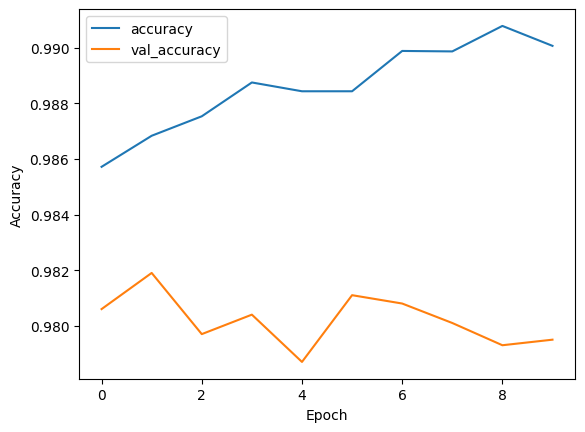

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Step 12: Save the Model
Once you’ve trained a model and are satisfied with its performance, you can save it for later use. This is especially useful if you’ve spent a lot of time and resources training a model and don’t want to have to retrain it every time you want to use it.

This will save the entire model (including the architecture, weights, and optimizer state) to the file my_model.h5 in the current working directory. You can then **load the model back** into memory at a later time using the load_model() function. Note that the load_model() function returns a new model object, which you can use to make predictions on new data.

In [ ]:
#model.save('my_model.h5')
model.save('/content/drive/MyDrive/Colab Notebooks/my_model.h5')       # at first you should mount colab to your google drive

## To LOAD your SAVED MODEL
#from tensorflow.keras.models import load_model
#loaded_model = load_model('my_model.h5')

How to mount colab to google drive?


```
from google.colab import drive
drive.mount('/content/drive')
```

How to load the saved model to use?


```
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/my_model.h5')
```


